In [12]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn
import statsmodels.api as sm
from scipy.stats import zscore
from statsmodels import regression
from statsmodels.tsa.stattools import coint

In [18]:
def seleciona_dados(s1,s2):
    _tick1 = s1[6:]
    _tick2 = s2[6:]

    dados = data[[s1,s2]].copy()
    dados[('Ch'+_tick1)],dados[('Ch'+_tick2)] = dados[s1].pct_change(),dados[s2].pct_change()
    dados = dados[1:]
    dados.columns = [_tick1,_tick2,s1,s2]
    return dados

def calcula_zscore_spread(dados, period):
    c = 0
    list_zs = [None]*period
    for i in range(period,len(dados)):
        S1 = dados[s1][c:i]
        S2 = dados[s2][c:i]
        S1 = sm.add_constant(S1)
        results = sm.OLS(S2,S1).fit()
        S1 = S1[s1]
        b = results.params[s1]
        spread = S2 - (b*S1)
        zs = zscore(spread)
        list_zs.append(zs[-1])
        c+=1
    return list_zs

In [5]:
def operador_high(dados, gatilho, encerra, carteira, t1,t2):
    posicao = 0 #1 - posicionado | 0 - neutro
    compra = 0
    venda = 0
    
    fin_long  = 0 #financeiro ponta long
    fin_short = 0 #financeiro ponta short 
    l_resultado = []
    l_cart = []
    
    for index in range(len(dados)):
        zs = dados['zs_spread'][dados.index == index+1].values[0]
        p_s1 = float(dados[t1][dados.index == index+1].values)
        p_s2 = float(dados[t2][dados.index == index+1].values)

        #abre operacao
        if zs >= gatilho and posicao == 0:
            q = (p_s1/p_s2) 
            v = carteira/2/p_s1 #volume de acordo com carteira
            
            fin_long  += p_s1*v   # 
            fin_short -= p_s2*v*q #  
            
            posicao = 1 #esta posicionado
        #encerra
        elif (zs > -encerra and zs < encerra) and posicao == 1:
#             print(f' C {compra:.2f} | V {venda:.2f} | ')
            fin_long   -= p_s1*v   #creditando venda da posicao
            fin_short  += p_s2*v*q #debita encerramento posicao
            
            posicao = 0 #esta neutro
            
            resultado = fin_long + fin_short
#             print(f'res: {resultado:.2f} | l:{fin_long:.2f} | s:{fin_short:.2f}')
            l_resultado.append(resultado)
            carteira+=resultado
            l_cart.append(carteira)
#             print(f'cart: {carteira:.2f}\n')
            
    return l_resultado, l_cart

In [14]:
data = pd.read_excel('/home/daniel/Desktop/Projetos/mql_python/Relatório 1/dados_relatorio.xlsx')

In [19]:
def seleciona_dados(s1,s2):
    _tick1 = s1[6:]
    _tick2 = s2[6:]

    dados = data[[s1,s2]].copy()
    dados[('Ch'+_tick1)],dados[('Ch'+_tick2)] = dados[s1].pct_change(),dados[s2].pct_change()
    dados = dados[1:]
    dados.columns = [_tick1,_tick2,s1,s2]
    return dados

In [20]:
s1,s2 = 'close ITUB4','close ITSA4'
dados = seleciona_dados(s1=s1,s2=s2)

In [21]:
dados.head()

,ITUB4,ITSA4,close ITUB4,close ITSA4
1,10.60,3.82,0.000944,0.000000
2,10.52,3.81,-0.007547,-0.002618
3,10.60,3.83,0.007605,0.005249
4,10.66,3.85,0.005660,0.005222
5,10.80,3.91,0.013133,0.015584


In [22]:
s1,s2 = 'close ITUB4','close ITSA4'
dados = seleciona_dados(s1=s1,s2=s2)

In [23]:
dados['zs_spread'] = calcula_zscore_spread(dados,period=90)

close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
clos

close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
clos

close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
close ITUB4
clos

In [27]:
dados.tail()

,ITUB4,ITSA4,close ITUB4,close ITSA4,zs_spread
1970,35.38,13.37,-0.004502,-0.008895,-0.711491
1971,35.71,13.46,0.009327,0.006731,-0.992644
1972,36.26,13.70,0.015402,0.017831,-0.260281
1973,36.16,13.64,-0.002758,-0.004380,0.756416
1974,35.96,13.60,-0.005531,-0.002933,-0.505642


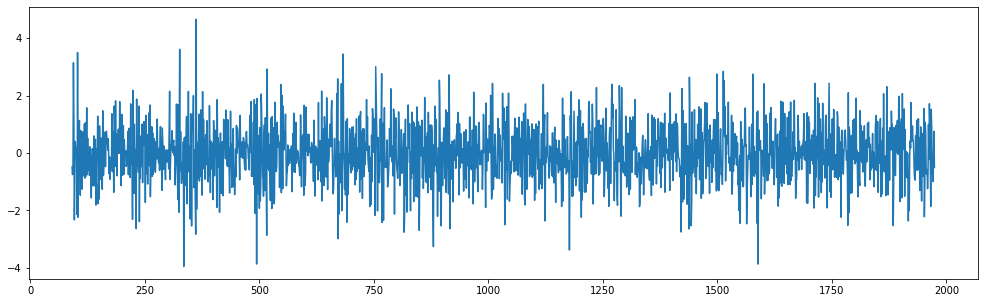

In [28]:
plt.figure(figsize=[17,5])
plt.plot(dados.zs_spread)


In [29]:
t1,t2 = 'ITUB4','ITSA4'
gats = [1.1] #lista de valores para ativar o gatilho da operacao 
encr = [.08] #valores para encerrar a operacao
capital = 10000 #valor inicial aportado 
testes = []

for i in gats:
    for j in encr:
        result = operador_high(dados,gatilho=i,encerra=j,carteira=capital,t1=t2,t2=t1)
        trades = result[0]
        testes.append(trades)

Soma: 31854.4841 | Gati=1.1,Encr=0.08
                 0
count    73.000000
mean    436.362796
std     324.431516
min    -476.419039
25%     211.001081
50%     425.807430
75%     672.248004
max    1298.454864




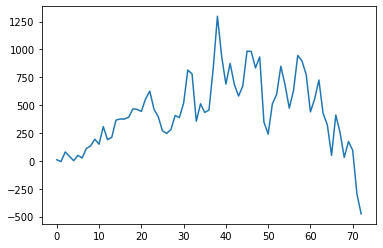

In [30]:
cont = 0
for i in gats:
    for j in encr:
        des = pd.DataFrame(testes[cont])
        print(f'Soma: {float(des.sum()):.4f} | Gati={i},Encr={j}')
        print(des.describe())
        print('\n')
        plt.plot(des)
        cont+=1

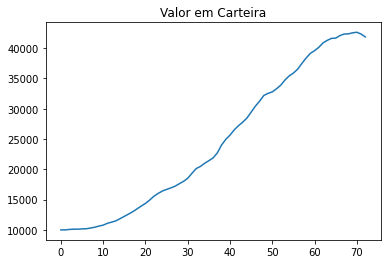

In [31]:
plt.title('Valor em Carteira')
plt.plot(result[1])
plt.show()